In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [2]:
data_source_url = "Tweets.csv"
tweets_data = pd.read_csv(data_source_url)

In [3]:
tweets_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets_data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [5]:
text=" ".join([review for review in tweets_data.text])

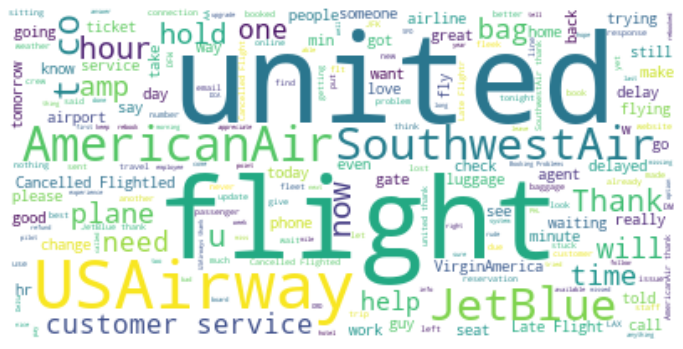

In [6]:
wordcloud=WordCloud(background_color='white').generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
stopwords=set(STOPWORDS)
stopwords.update(["United", "AmericanAir", "SouthwestAir", "JetBlue", "USAirways", "VirginAmerica"])

In [8]:
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)

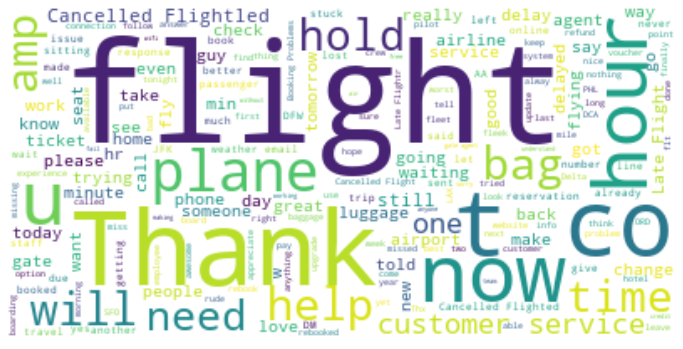

In [9]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
plot_size=plt.rcParams['figure.figsize']
print(plot_size[0])
print(plot_size[1])

6.0
4.0


In [11]:
plot_size[0]=8
plot_size[1]=6

In [12]:
plt.rcParams['figure.figsize']=plot_size

<AxesSubplot:ylabel='airline'>

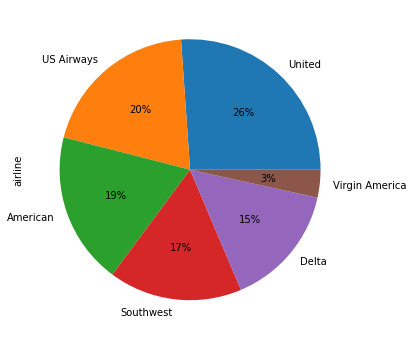

In [13]:
tweets_data.airline.value_counts().plot(kind='pie',autopct='%1.0f%%')

<AxesSubplot:ylabel='airline_sentiment'>

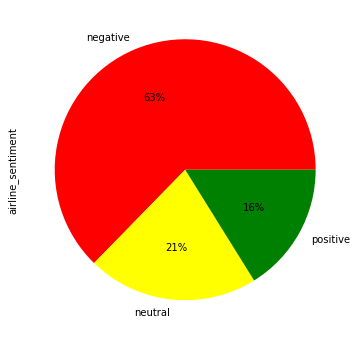

In [14]:
tweets_data.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%',colors=['red','yellow','green'])

In [15]:
airline_sentiment=tweets_data.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()

<AxesSubplot:xlabel='airline'>

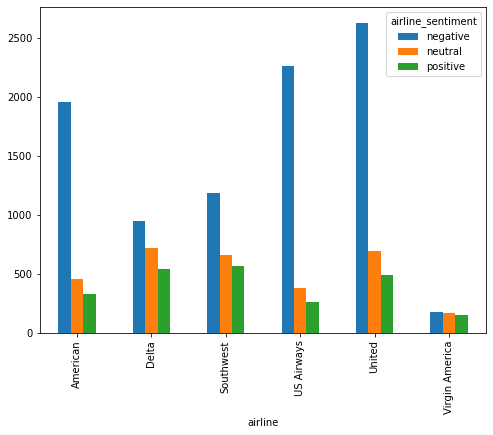

In [16]:
airline_sentiment.plot(kind='bar')

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

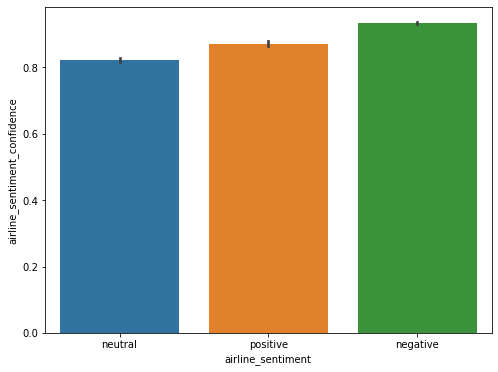

In [20]:
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data=tweets_data)

In [21]:
tweets_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [22]:
features=tweets_data['text'].values

In [23]:
labels=tweets_data['airline_sentiment']

In [24]:
processed_features = []

for sentence in range(0, len(features)):
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)

In [25]:
processed_features

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bodhimonk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
vectorizer=TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))

In [28]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [29]:
processed_feature_vec=vectorizer.fit_transform(processed_features).toarray()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_text,y_train,y_test=train_test_split(processed_feature_vec,labels,test_size=0.2,random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
text_classifier=RandomForestClassifier(n_estimators=200,random_state=0)

In [34]:
text_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [35]:
predict=text_classifier.predict(X_text)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [37]:
print(confusion_matrix(y_test,predict))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]


In [38]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928



In [39]:
print(accuracy_score(y_test,predict))

0.7599043715846995


In [40]:
for i in range(0,5):
    rand_index=np.random.randint(0,len(processed_features))
    test_sample=processed_features[rand_index]
    print(test_sample)
    
    vector=vectorizer.transform([test_sample])
    output=text_classifier.predict(vector.toarray())
    print(str(output[0]))

 united bags left behind because plane overweight be great if knew as soon as we landed instead letting us wait 45 minutes with no info 
negative
 virginamerica you guys are perfect as always lt 3 wervirgin
positive
 jetblue haha you re doing everything right don change thing slash this twitter engagement just makes you even cooler bestairline
negative
 southwestair sorry to spam it would just be so awesome to see imaginedragons in vegas your help would be absolutely amazing 
positive
 jetblue flight was cancelled flighted do need to file claim for the 50 credit m entitled to per yr bill of rights or will it just be issued 
negative
